# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

### Домашнее задание №3. Математическая статистика в анализе данных

Задание выполнил(а):

Наливайченко Дарья


### Общая информация

__Дата выдачи:__ 30.03.2025

__Дедлайн:__ 04:00 07.04.2025

### Оценивание и штрафы

Каждое задание в рамках данного домашнего задания оценивается в 4 балла.

Оценка за домашнее задание вычисляется по следующей формуле:

$$
s_{\text{stat}} \times 1/2 ,
$$

где $s_{\text{stat}}$  — количество баллов, которое вы набрали в сумме по всем заданиям.

За сдачу домашнего задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

__Внимание!__ Домашнее задание выполняется самостоятельно. Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов.

Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) допускается исключительно в рамках справочной и образовательной информации. Любые другие случаи применения средств ИИ — например, для автоматической генерации кода по заданию — считаются плагиатом, и такое домашнее задание оценивается в 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе — указан для каждой группы в нашем телеграм-канале.

### О задании

В данном домашнем задании вы попрактикуетесь в применении методов математической статистики в анализе данных. Мы постарались подобрать для вас как можно более интересные и репрезентативные задания, максимально приближенные к тому, что реально используется при проведении A/B-тестирований и решении различных бизнес-задач в этой области.

В данном домашнем задании вам, вероятно, потребуется больше, чем обычно, осуществлять поиск информации как практического, так и теоретического характера, посредством чтения статей и различных материалов. Это ***нормально*** и лишь поможет вам глубже и качественнее, в понятном и комфортном для вас темпе, разобраться в непростом материале, связанном с математической статистикой в анализе данных.

Обратите внимание, что фактически во всех заданиях вам потребуется написать какой-то текст в виде вывода/результата/итога/какого-то резюме. Пожалуйста, не ленитесь, и пишите выводы ***подробно*** — существенная часть баллов будет выставляться именно за выводы, так как в анализе данных в целом, — а в разделе математической статистики — в особенности, — они имеют ключевое, наиболее заметное значение.
Текст выводов/комментариев пишите в отдельных ячейках, используя средства текстового редактора Jupyter Notebook/Google Colab, при необходимости используйте средства *выделения*. Написанные выводы подкрепляйте выполненным кодом программы.

При выполнении заданий данного домашнего задания нет абсолютно никаких ограничений на используемые библиотеки и применяемые вами методы, функционал.

### Задание 1

Проанализируйте набор данных и ответьте на следующие вопросы:

1) Какой процент наблюдений выходит за 5 и 95 перцентиль?

2) Какому закону распределения отвечают данные? На основе чего вы так решили?

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

Описание данных:

* metrics — значение определенной метрики в сервисе для пользователя (например, количество кликов).

*Вместе с ответом на задание приложить код*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
task_1 = pd.read_csv('test_1_1.csv')
task_1.head() #я не понимаю почему, но нужно исправить ошибку отображения данных, так как иначе файл будет нечитаем для дальнейшего анализа
#то есть избавимся от странной записи чисел в колонках
task_1_1 = pd.read_csv('test_1_1.csv', sep=';')# стало лучше, начинаем работу
task_1_1.head()
p5 = task_1_1['metrics'].quantile(0.05)
p95 = task_1_1['metrics'].quantile(0.95)
print(f'5 перцентиль: {p5}, 95 перцентиль: {p95}')
vne = task_1_1[(task_1_1['metrics'] < p5) | (task_1_1['metrics'] > p95)]
print (len(vne)/len(task_1_1)*100)

5 перцентиль: 1.0, 95 перцентиль: 52.0
4.987306046493438


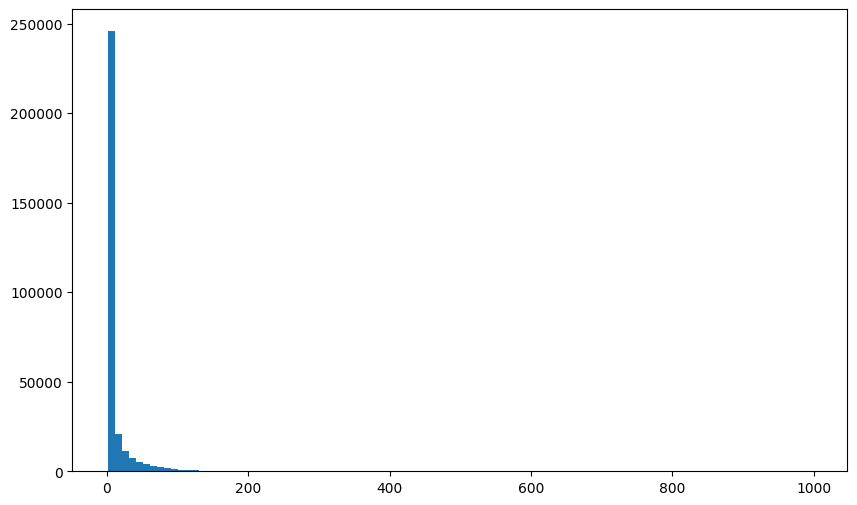

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(task_1_1['metrics'], bins=100)
plt.show()

**РАЗМЫШЛЕНИЯ**
на первый взгляд (на мой не особо профессиональный) - это может быть распределение Пуассона. однако, в четвертом задание мы вычислили дисперсию и среднее мат. ожидание, где дисперсия намного больше среднего ожидания. получается, гипотеза о распределение Пуассона отклоняется.

нормальное распределение мы не рассматриваем, так как на гистограмме видно, что отсутсвует симмитричное распределение (как минимум отсутствует левая часть гистограммы).

In [4]:
from scipy import stats

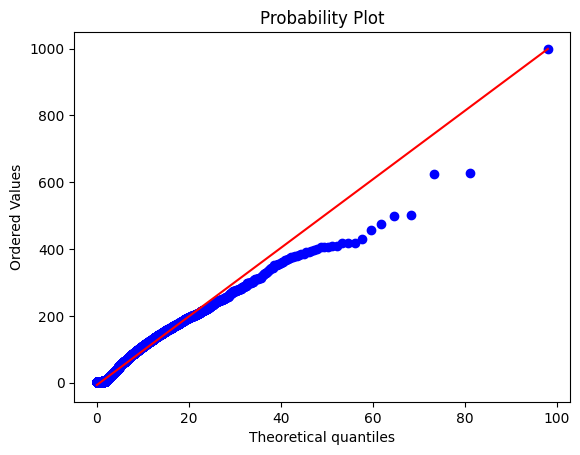

In [5]:
stats.probplot(task_1_1['metrics'], dist = "lognorm", sparams = (1,), plot=plt)
plt.show()

**ВЫВОД **

в данной части мы сравнили распределение данных с прикрепленным датасетом с логнормальным распределением. можно обратить внимание, что распределение наших данных почти совпадает с логнормальным (неидеально, конечно, так как есть большой выброс, из-за чего наши данные, немного "клонятся" вниз)

Однако, я останавливаю свой выбор на ***логнормальном распределение ***


### Задание 2

Определите, можно ли сравнить две представленные выборки t-критерием Стьюдента?

Если нельзя сравнивать t-критерием, то что будем использовать и почему?

Ответ аргументировать и описать.

[Ссылка на данные](https://drive.google.com/file/d/1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy/view?usp=sharing)

Описание данных:

* variant — вариация в А/B тесте (например, группа А — сайт без изменений; группа B — сайт с изменениями)
* metrics — значение определенной метрики в сервисе для пользователя (например, количество кликов).

*Вместе с ответом на задание приложить код*

In [6]:
task2_1 = pd.read_csv('test_1_2.csv')
task2_2 = pd.read_csv('test_1_2.csv', sep=';')
task2_2.head() #здесь данные опять отображаются не совсем правильно (точнее не совсем правильно для анализа), поэтому проделываем
#то же самое, что и в прошлом задание

,Unnamed: 0,variant,metrics
0,1,A,1
1,2,B,1
2,3,A,4
3,4,B,37
4,5,B,4


In [21]:
A = task2_2[task2_2['variant'] == 'A'] #разделимм данные на две группы для проведение тестов
B = task2_2[task2_2['variant'] == 'B']
A = pd.to_numeric(A['metrics'], errors='coerce') #приводим данные к числовым значениям (на всякий случай) и выбрасываем пропуски
B = pd.to_numeric(B['metrics'], errors='coerce')
A_1 = A.dropna()
B_2 = B.dropna()
A_1_norm = A_1.sample(n = 1000, random_state=20) #выбираем 1 000 случайных значений для Sharp Wilk, выборкой 20
B_2_norm = B_2.sample(n = 1000, random_state=20)
wiki_a = stats.shapiro(A_1_norm) #и наконец-то проверяем нормальность распределения с помощью SharpWilki для обеих групп
wiki_b = stats.shapiro(B_2_norm)
print(wiki_a) #наши данные меньше 0.05, поэтому мы говорим о том, что данные распределены не нормально. это самым главным образом противоречит
# использованию t-критерия Стьюдента
print(wiki_b)
dispers = stats.levene(A_1, B_2) #проверим еще гомогенность дисперсий
print(dispers) #по результату, дисперсия опять-таки меньше 0.05, поэтому разброс значений разный. то есть опять-таки t-критерий Стьюдента не подходит

stat, p_value = stats.mannwhitneyu(A_1, B_2)#для данных, которые у нас есть можно использовать Mann Whitney. данный тест помогает с данными
#которые ненормально распределены
print(f'Статистика: {stat}, p-value: {p_value}') #полученные результаты говорят о том, что разница между выборками значима. то есть эти две группы
# А и В отличаются друг от друга.
#еще для этих данных можно применить Колмогорова-Смирнова, чтобы сравнить распределение. но то, что я выбрала до этого лучше демонстрирует то
#что требовалось

ShapiroResult(statistic=np.float64(0.47738499153230585), pvalue=np.float64(4.744018527371819e-47))
ShapiroResult(statistic=np.float64(0.48717736525814526), pvalue=np.float64(9.314537081872129e-47))
LeveneResult(statistic=np.float64(4.313416821004634), pvalue=np.float64(0.03781432358426188))
Статистика: 4195358346.0, p-value: 2.7311182624546524e-05


### Задание 3

Даны две выборки по А/B тесту.

Две выборки несбалансированные — кол-во пользователей в каждой группе разное.

Метрика, которую мы измеряем в эксперименте (и которую используем для определения группы, показавшей себя лучше) — количество просмотренных страниц на пользователя.

Как вы будете принимать решение, какая группа: A или B — продемонстрировала лучшие результаты? И какие статистические методы (критерии) вы будете использовать для этого? Какие преобразования к данным в целях улучшения точности и качества стоило бы применить? Сделайте это!

Если идеи не приходят в голову, рекомендуем вам дополнительно почитать про A/B тесты и работу с несбалансированными выборками.

[Ссылка на данные](https://drive.google.com/file/d/1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba/view?usp=sharing)

Описание данных:

* variant — вариация в А/B тесте (например, группа А — сайт без изменений; группа B — сайт с изменениями)
* metrics — значение определенной метрики в сервисе; в данном случае — количество просмотренных страниц на пользователя.

*Вместе с ответом на задание приложить код*

In [8]:
task3 = pd.read_csv('hw2_test_1_3.csv')
task3.head()
task3_1 = pd.read_csv('hw2_test_1_3.csv', sep=';')
task3_1.head() #так как здесь опять данные отображаются не совсем корректно, проделаем то же самое, что и в прошлых заданиях

,Unnamed: 0,variant,metrics
0,1,A,1
1,2,A,4
2,3,A,15
3,4,A,1
4,5,A,10


variant
A    92686
D    15413
Name: count, dtype: int64
variant
A    10.099562
D     9.942386
Name: metrics, dtype: float64
           count       mean        std  min  25%  50%  75%    max
variant                                                          
A        92686.0  10.099562  23.130148  1.0  1.0  2.0  7.0  998.0
D        15413.0   9.942386  21.802747  1.0  1.0  2.0  7.0  406.0


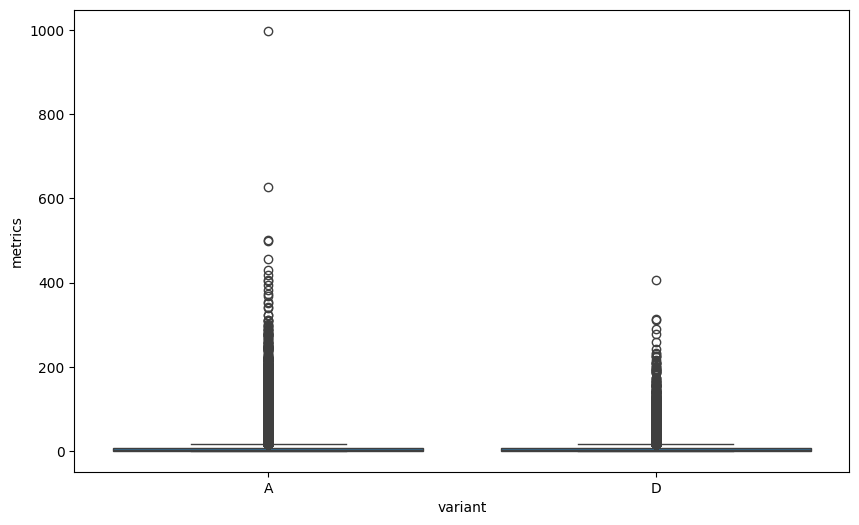

In [9]:
counts = task3_1['variant'].value_counts()
print(counts)
mean = task3_1.groupby('variant')['metrics'].mean()
print(mean)
describe = task3_1.groupby('variant')['metrics'].describe()
print(describe)

plt.figure(figsize=(10, 6))
sns.boxplot(x='variant', y='metrics', data=task3_1) #используем "ящик с усами", так как данная визуализация отображает лучше всего распределение
#между двумя выборками
plt.show()
#на основе данных, которые мы получили, можно сказать, что в выборке А в шесть раз больше. однако выборки несбалансированы (как и было сказано)
#как и в предыдущем задание t-критерий нельзя применить (из-за данных). можно использовать тот же тест Mann Whitney
#также для разнообразия практики можно попробоать t-критерий Стюдента для логарифмированных данных. данный способ сожмет выбросы и сделает распределние
#более симметричным.
#

In [23]:
g_A = task3_1[task3_1['variant'] == 'A']
g_D = task3_1[task3_1['variant'] == 'D']
log_A = np.log1p(g_A['metrics'])
log_D = np.log1p(g_D['metrics'])
t_test = stats.ttest_ind(log_A, log_D)
print(t_test)
stat1, p_value1 = stats.mannwhitneyu(log_A, log_D)
print(f'Статистика: {stat1}, p-value: {p_value1}')
# с помощью данных тестов мы увидели, что особых различий в выборках нет. статистической разницы между двумя выборками нет
# для анализа мы "улучшили" данные с помощью логарифмирования.

TtestResult(statistic=np.float64(-0.8945298081183504), pvalue=np.float64(0.3710404801849694), df=np.float64(108097.0))
Статистика: 710155085.5, p-value: 0.2291154549185962


### Задание 4

Есть данные с большой дисперсией у метрики — дисперсию метрики можно посчитать для каждой группы. Для дальнейшего анализа этих данных дисперсию необходимо сократить.

Как определить, что дисперсия действительно большая? Если она большая, то как вы будете ее чистить?

Ответ аргументировать и описать.

Если идеи не приходят в голову, рекомендуем вам дополнительно почитать про A/B тесты и снижение дисперсии в них.

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

Описание данных:

* metrics — значение определенной метрики в сервисе для пользователя (например, количество кликов).

*Вместе с ответом на задание приложить код*

In [11]:
mean = task_1_1['metrics'].mean()
std = task_1_1['metrics'].std()
print(mean)
print(std)
dis = std*std
print (dis) #кажется, дисперсия очень большая. в сравнение со средним математическим ожиданием (которое равно 22)
# для уверенности посчитаем коэффициент вариации, чтобы понять насколько большой разброс данных
cv = std/mean
print (cv) #оно больше 2, значит дисперсию можно категорезировать как "большая"

10.146275408276
22.6273779454325
511.9982326854451
2.2301166718750856


In [14]:
# в виду страха испортить данные в датасете, скопируем их в другой
task_1_2 = task_1_1.copy()
task_1_2['log'] = np.log1p(task_1_2['metrics'])
log = np.log1p(task_1_2['metrics'])
print (log.head()) #находим логарифмические значение в колонке metrics, чтобы подставить их в значение классов
task_1_2['cohort'] = pd.cut(
    task_1_2['log'],
    bins=[- np.inf, 0.7, 1.6, np.inf],
    labels=['1', '2', '3']
)
table = task_1_2.groupby("cohort")["metrics"].agg(["count", "mean", "std"])
table["cv"] = table["std"] / table["mean"]
table # в этой таблице мы видим, что дисперсия сразу уменьшилась. значит, способ кластеризации помог.
#я выбрала метод кластеризации, так как используется распредление по группам, которые имеют меньший разброс (в моем случае - логарифмические значения)
#в том числе далее сравнивается каждый класс(когорта) отдельно. поэтому, данный способ подходит (по крайней мере на этих данных)

0    0.693147
1    0.693147
2    1.609438
3    0.693147
4    0.693147
Name: metrics, dtype: float64


<ipython-input-14-9c5e3023a192>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = task_1_2.groupby("cohort")["metrics"].agg(["count", "mean", "std"])


,count,mean,std,cv
cohort,,,,
1,132041,1.000000,0.000000,0.000000
2,60782,2.360337,0.480102,0.203404
3,114016,24.889191,32.112575,1.290222


### Задание 5

В компании проводится эксперимент с поисковыми подсказками. Вы хотите определить, как изменился CTR в каждой группе эксперимента.

Задача:
- сформировать метрику для оценки эксперимента
- подобрать критерий под особенности данных
- сделать вывод о значимости эффекта

[Ссылка на данные](https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv)

Описание данных:
- id — уникальный идентификатор пользователя
- action — 🕊️
- view — количество просмотров на одну сессию
- variant — вариация в А/B тесте, где 0 — это версия "A", 1 —  версия "B".

*Вместе с ответом на задание приложить код*


In [15]:
task5 = pd.read_csv ('task5.csv')
task5.head() #тут данные отображаются корректно, не нужно ничего исправлять (спасибо)

,id,variant,view,action
0,88258,A,10,2
1,109938,A,3,1
2,117644,A,7,5
3,374080,A,9,9
4,662082,A,1,1


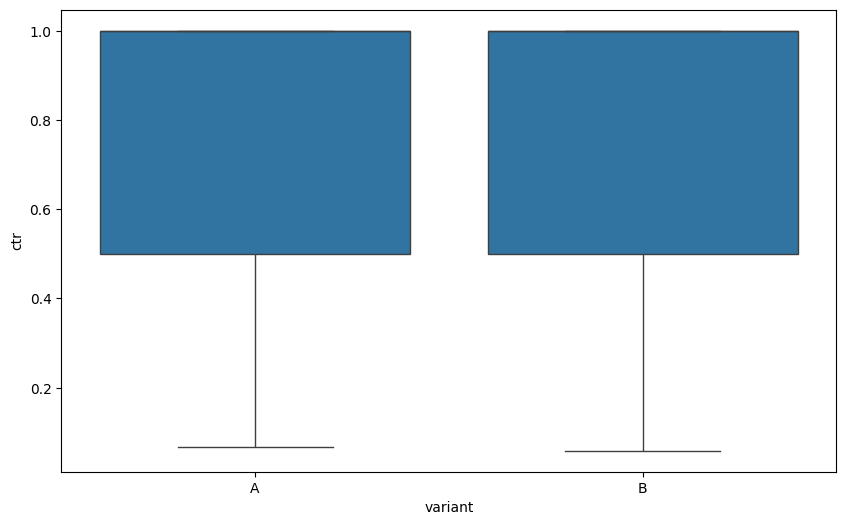

Статистика: 0.7613945386061419, p-value: 0.4464433737206549
Статистика: 8325404.5, p-value: 0.3570928785921109


In [16]:
task5['ctr'] = task5['action']/task5['view']
#CTR отражает частоту перехода пользователей на элемент после его показа (сколько раз на него кликнули, после того, как сайт его продемонстрировал)

gr_A = task5[task5['variant'] == 'A']['ctr']
gr_B = task5[task5['variant'] == 'B']['ctr']

plt.figure(figsize=(10, 6))
sns.boxplot(x='variant', y='ctr', data=task5)
plt.show()

stat, p_value = stats.ttest_ind(gr_A, gr_B) #попробовали использовать t-test, но данные показали, что он не совсем корректно отображает желаемые результаты
#возможно, это из-за того, что CTR имеет бинарный признак ( то есть либо 0, либо 1 - пользователь кликнул, или не кликнул). а t-test требует нормальности распределения
print(f'Статистика: {stat}, p-value: {p_value}')

stat1, p_value1 = stats.mannwhitneyu(gr_A, gr_B)# данный способ помог увидеть статистику лучше, поэтому можно остановиться на нем. (он не трубет нормальности данных, поэтому помог)
print(f'Статистика: {stat1}, p-value: {p_value1}')
#однако тем не менее результаты показали, что при изменениях в группах большой эффект не произошел. то есть значимого эффекта нет.

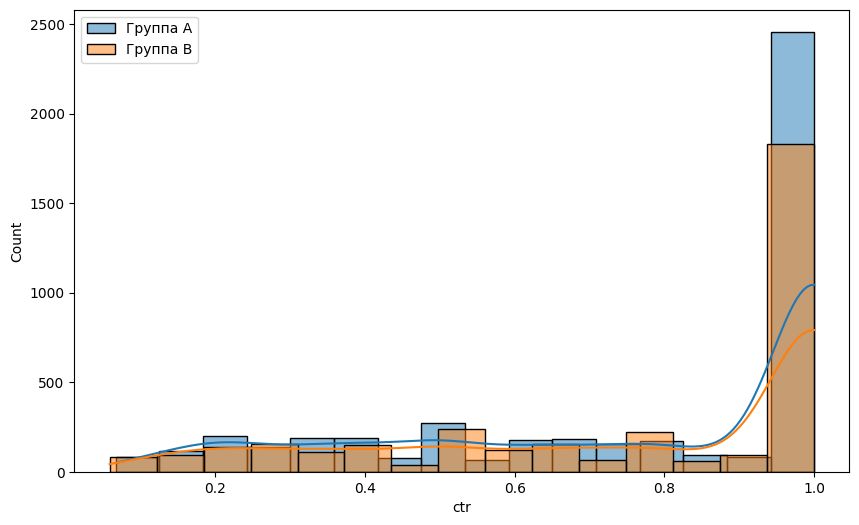

In [17]:
#для закрепления результата попробуем другую визуализацию (конечно, результаты от этого не поменяются, но убедимся точно)
plt.figure(figsize=(10, 6))
sns.histplot(gr_A, kde=True, label='Группа A')
sns.histplot(gr_B, kde=True, label='Группа B')
plt.legend()
plt.show()
#группа B немного шире, однако несильно. это еще раз подтверждает, что значимость эффекта слабая. данная визуализация подтверждает то, что бы увидели
#в предыдущей гистограмме

In [20]:
#заключительным тестом сделаем метод моментов (то есть используем теорию из лекци
A_mean = gr_A.mean()
B_mean = gr_B.mean()
A_str = gr_A.std()
B_str = gr_B.std()
A_common = (A_mean*(1-A_mean)/(A_str**2))- 1
alpha1 = A_mean*A_common
beta1 = (1-A_mean)*A_common
print (alpha1, beta1)
B_common = (B_mean*(1-B_mean)/(B_str**2))- 1
alpha2 = B_mean*B_common
beta2 = (1-B_mean)*B_common
print (alpha2, beta2)
#метод моментов окончательно доказал, что больших различий между

0.7873869298453519 0.2464938162212024
0.786292203985852 0.25309266396678765
